Exercice 1. (Analyse de la base de données “investment data”) La lecture d’un tuto- riel pandas pourra être utile : http://pandas.pydata.org/pandas-docs/stable/tutorials.html. Nous travaillons sur la base de données Investment Data Set1 qui peut être téléchargée depuis https://bitbucket.org/portierf/shared_files/downloads/invest.txt. Avant de commencer, on réalisera l’exercice 12 du polycopié : ”explicit formulas when p “ 1 for prediction intervals", se trouvant dans le chapitre 3 : “Confidence intervals and hypothesis testing”. On pourra aussi lire la section 3.1.1 de ce même chapitre du polycopié.

1. Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table conte- nant les 5 premières observations.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib notebook
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load data
url = 'https://bitbucket.org/portierf/shared_files/downloads/invest.txt'
df = pd.read_csv(url, sep=' ')
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


In [7]:
df.describe()


,year,gnp,invest,cpi,interest
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667
std,4.472136,738.145808,117.582691,40.286606,2.812245
min,1968.000000,873.400000,133.300000,82.540000,4.500000
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000
max,1982.000000,3057.500000,471.500000,207.230000,13.420000


2. Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

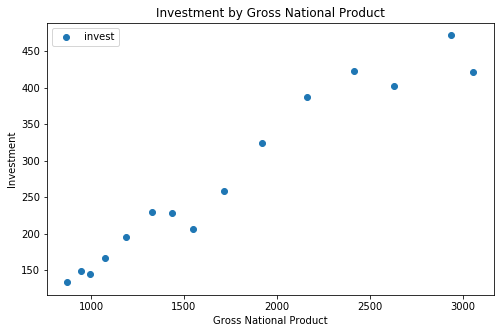

In [8]:
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.plot(df['gnp'], df['invest'])
#ax.set_xlabel('Gross National Product')

plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

plt.plot(df['gnp'], df['invest'], "o")
plt.title("Investment by Gross National Product")
plt.legend()
plt.show()

3) Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté θˆn dans R^2 .

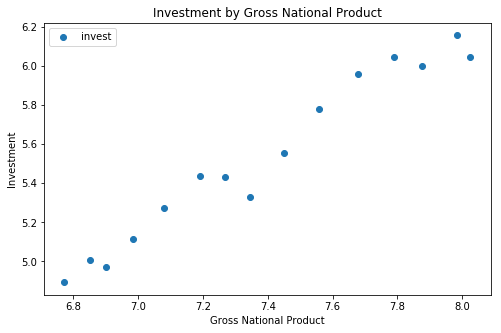

In [9]:
#Transformation des variables selon l'échelle logarythmique
X_log = df['gnp'].apply(np.log)
Y_log = df['invest'].apply(np.log)

plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

plt.plot(X_log, Y_log, "o")
plt.title("Investment by Gross National Product")
plt.legend()
plt.show()

Beta0 = -1.963591 Beta1 = 1.015281


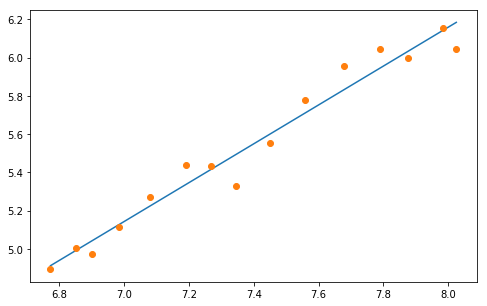

In [10]:
# Calcul des moyennes
Y_mean = Y_log.mean()
X_mean = X_log.mean()

# Calcul des variances
X_var = X_log.var(ddof=0)
Y_var = Y_log.var(ddof=0)

#Beta1 = (X_log - X_mean).T.dot(Y_log - Y_mean) / np.sum((X_log - X_mean)**2)
Beta1 = ((X_log - X_mean) * (Y_log - Y_mean)).mean() / X_var
Beta0 = Y_mean - Beta1 * X_mean

print("Beta0 = {:f} Beta1 = {:f}".format(Beta0,Beta1))

plt.figure(figsize=(8,5))
plt.plot(X_log, X_log * Beta1 + Beta0)
plt.plot(X_log, Y_log, "o")

In [11]:
N = df['gnp'].count()
SigmaSquare = (1 / (N - 2) ) * np.sum((Y_log - (Beta0 + Beta1 * X_log))**2)
print("Sigma carré = %f" % SigmaSquare)

#VarBeta0 = SigmaSquare *(1/N + X_mean**2 /np.sum((X_log - X_mean)**2))
VarBeta0 = SigmaSquare *(1/N + X_mean**2 / (N * X_var))
EcartTypeBeta0 = np.sqrt(VarBeta0)

VarBeta1 = SigmaSquare / (N * X_var)
EcartTypeBeta1 = np.sqrt(VarBeta1)

print("EcartTypeBeta0 = %f" % EcartTypeBeta0)
print("EcartTypeBeta1 = %f" % EcartTypeBeta1)

Sigma carré = 0.007676
EcartTypeBeta0 = 0.409547
EcartTypeBeta1 = 0.055383


In [12]:
# Coéficient de détermination (formule sans le "1 -")
R2 = np.sum((Beta0 + Beta1 * X_log - Y_mean)**2) / np.sum((Y_log - Y_mean)**2)

In [13]:
print("Coefficient R2 = %f" % R2)

Coefficient R2 = 0.962757


In [14]:
# Quantile Student à N - 2 = 13 degrés de liberté pour alpha = 0.05
alpha = 0.05
QuantStudent = stats.t.ppf(alpha,N-2)
print("Quantile de Student alpha 0.05, 13 degrés = %f" % QuantStudent)

Quantile de Student alpha 0.05, 13 degrés = -1.770933


In [15]:
# La statistique de test est : Beta1 - 0 / Ecartype de Beta1
# on fait l'hypothèse de Beta1vrai = 0 pour voir si Beta1 est significatif
T1 = Beta1 / EcartTypeBeta1
print("statistique de test : ", T1)
# p-valeur
Pvaleur1 = (1 - stats.t.cdf(np.abs(T1),N - 2)) * 2
print("P-valeur : " + str(Pvaleur1))
print("La p-valeur est très petite donc Beta1 est significatif")

statistique de test :  18.33198445686667
P-valeur : 1.1363709973011282e-10
La p-valeur est très petite donc Beta1 est significatif


5) Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à ex- pliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CIpxq et PIpxq, respectivement (avec les notations du polycopié, x “ p1, 1000qT ).

In [16]:
# Prédiction pour GNP = 1000
X_new = 1000
X_new_log = np.log(X_new)
YPred_log = Beta0 + Beta1 * X_new_log
print("Prédiction log : GNP = %f, prédiction = %f" % (X_new_log,YPred_log))
print("Prédiction origine GNP = 1000, prédiction = %f" % np.exp(YPred_log ))

Prédiction log : GNP = 6.907755, prédiction = 5.049724
Prédiction origine GNP = 1000, prédiction = 155.979428


In [17]:
# page 24 poly - Question 5
var_Yhat = np.sqrt(SigmaSquare) * np.sqrt( 1/N + ((X_new_log - X_mean)**2) /np.sum((X_log - X_mean)**2))
print("variance de Y chapeau (pour GNP = 1000) = %f" % var_Yhat)

variance de Y chapeau (pour GNP = 1000) = 0.034728


In [18]:
# IC
alpha = 0.1
QuantStudent = stats.t.ppf(1 - alpha/2,N-2)

BorneInf = YPred_log - var_Yhat * QuantStudent
BorneSup = YPred_log + var_Yhat * QuantStudent
print("Yprédiction log = %f - IC [%f, %f]" % (YPred_log,BorneInf,BorneSup))

Yprédiction log = 5.049724 - IC [4.988223, 5.111225]


In [19]:
var_Y_Aexpliquer = np.sqrt(SigmaSquare) * np.sqrt(1 + 1/N + ((X_new_log - X_mean)**2) /np.sum((X_log - X_mean)**2))
print("variance de Y à expliquer = %f" % var_Y_Aexpliquer)

variance de Y à expliquer = 0.094246


In [20]:
alpha = 0.1
QuantStudent = stats.t.ppf(1 - alpha/2,N-2)

BorneInf = YPred_log - var_Y_Aexpliquer * QuantStudent
BorneSup = YPred_log + var_Y_Aexpliquer * QuantStudent

print("Yprédiction log = %f - IP [%f, %f]" % (YPred_log,BorneInf,BorneSup))

Yprédiction log = 5.049724 - IP [4.882820, 5.216628]


6) Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

In [21]:
df['gnp_log'] = X_log
df['invest_log'] = Y_log
df = df[['year','gnp','invest','gnp_log', 'invest_log', 'cpi', 'interest']]

In [22]:
def calculate_borne_inf_CI(x):
    y = Beta0 + Beta1 * x
    varpred = np.sqrt(SigmaSquare) * np.sqrt( 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y - varpred * QuantStudent

In [23]:
def calculate_borne_sup_CI(x):
    y = Beta0 + Beta1 * x
    varpred = np.sqrt(SigmaSquare) * np.sqrt( 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y + varpred * QuantStudent

In [24]:
df['prédiction'] = Beta0 + Beta1 * X_log
df['CI_Inf'] = calculate_borne_inf_CI(df['gnp_log'])
df['CI_Sup'] = calculate_borne_sup_CI(df['gnp_log'])

In [25]:
def calculate_borne_inf_PI(x):
    y = Beta0 + Beta1 * x
    varexp = np.sqrt(SigmaSquare) * np.sqrt(1 + 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y - varexp * QuantStudent

In [26]:
def calculate_borne_sup_PI(x):
    y = Beta0 + Beta1 * x
    varexp = np.sqrt(SigmaSquare) * np.sqrt(1 + 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y + varexp * QuantStudent

In [27]:
df['PI_Inf'] = calculate_borne_inf_PI(df['gnp_log'])
df['PI_Sup'] = calculate_borne_sup_PI(df['gnp_log'])
df

,year,gnp,invest,gnp_log,invest_log,cpi,interest,prédiction,CI_Inf,CI_Sup,PI_Inf,PI_Sup
0,1968,873.4,133.3,6.772394,4.892602,82.54,5.16,4.912294,4.840199,4.984389,4.741203,5.083385
1,1969,944.0,149.3,6.850126,5.005958,86.79,5.87,4.991214,4.925322,5.057107,4.822643,5.159786
2,1970,992.7,144.2,6.900429,4.971201,91.45,5.95,5.042285,4.980237,5.104334,4.875179,5.209392
3,1971,1077.6,166.4,6.982492,5.114395,96.01,4.88,5.125603,5.069459,5.181746,4.960598,5.290607
4,1972,1185.9,195.0,7.078257,5.273000,100.00,4.50,5.222832,5.172818,5.272845,5.059810,5.385853
5,1973,1326.4,229.8,7.190224,5.437209,105.75,6.44,5.336509,5.292188,5.380831,5.175143,5.497875
6,1974,1434.2,228.7,7.268362,5.432411,115.08,7.83,5.415842,5.374218,5.457466,5.255196,5.576488
7,1975,1549.2,206.1,7.345494,5.328361,125.79,6.25,5.494152,5.453917,5.534387,5.333860,5.654444
8,1976,1718.0,257.9,7.448916,5.552572,132.34,5.50,5.599155,5.558582,5.639727,5.438778,5.759531
9,1977,1918.3,324.1,7.559195,5.781052,140.05,5.46,5.711118,5.667508,5.754729,5.549946,5.872290


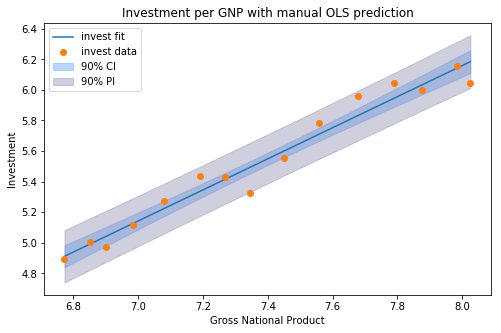

In [28]:
plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.plot(X_log, X_log * Beta1 + Beta0, label='invest fit')
plt.plot(X_log, Y_log, "o", label='invest data')
plt.fill_between(X_log, df['CI_Inf'], df['CI_Sup'], color = '#539cff', alpha = 0.4, label = '90% CI')
plt.fill_between(X_log, df['PI_Inf'], df['PI_Sup'], color = '#8888aa', alpha = 0.4, label = '90% PI')
plt.title("Investment per GNP with manual OLS prediction")
plt.legend()

7) En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de dé- termination ainsi que l’investissement prédit par le modèle quand GNP vaut 100. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [29]:
regr = linear_model.LinearRegression()
regr.fit(df[['gnp_log']],Y_log)
Beta0Sklearn = regr.intercept_
Beta1Sklearn = regr.coef_[0]
print("ScikitLearn : Beta0 = {:f}, Beta1 = {:f}".format(Beta0Sklearn,Beta1Sklearn))
print("Calcul manuel : Beta0 = {:f}, Beta1 = {:f}".format(Beta0,Beta1))
print("Les Beta0 sont-ils proches ? {}".format(np.isclose(Beta0, Beta0Sklearn)))
print("Les Beta1 sont-ils proches ? {}".format(np.isclose(Beta1, Beta1Sklearn)))

ScikitLearn : Beta0 = -1.963591, Beta1 = 1.015281
Calcul manuel : Beta0 = -1.963591, Beta1 = 1.015281
Les Beta0 sont-ils proches ? True
Les Beta1 sont-ils proches ? True


In [30]:
X_new_log = np.log(1000)
# En utilisant les coefficients Beta individuellement
# InvestPred_Gnp1000 = np.exp(Beta0Sklearn + X_new_log * Beta1Sklearn)

# En utilisant la fonction predict sur une valeur directement
InvestPred_Gnp1000 = np.exp(regr.predict([[X_new_log]]))[0]
print("Prédition SciKitLearn pour GNP = 1000 : {:f}".format(InvestPred_Gnp1000))
print("Prédiction manuelle pour GNP = 1000 : {:f}".format(np.exp(YPred_log)))
print("Les prédictions sont-elles proches ? {}".format(np.isclose(np.exp(YPred_log),InvestPred_Gnp1000)))

Prédition SciKitLearn pour GNP = 1000 : 155.979428
Prédiction manuelle pour GNP = 1000 : 155.979428
Les prédictions sont-elles proches ? True


In [31]:
# Prédictions Sklearn sur toutes les données X
Y_pred_Sklearn = regr.predict(pd.DataFrame(X_log))


In [32]:
R2_Sklearn = r2_score(y_pred=Y_pred_Sklearn,y_true=Y_log)
print("Coefficient R2 de SciKitLearn = {:f}".format(R2_Sklearn))
print("error quad :{}".format(mean_squared_error(y_pred=Y_pred_Sklearn,y_true=Y_log)))

Coefficient R2 de SciKitLearn = 0.962757
error quad :0.006652826748065679


8) Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).

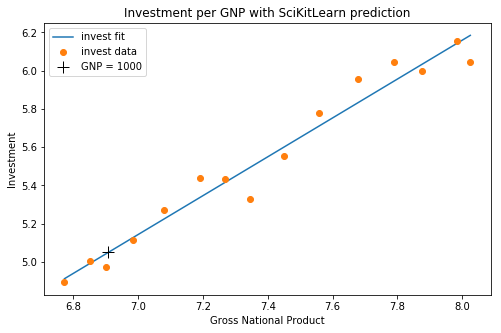

In [33]:
plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.plot(X_log, Beta0Sklearn + X_log * Beta1Sklearn, label='invest fit')
#abscisse = np.linspace(X_log.min(), X_log.max())
#plt.plot(abscisse, Beta0Sklearn + abscisse * Beta1Sklearn, label='invest fit')

plt.plot(X_log, Y_log, "o", label='invest data')
plt.plot(X_new_log, np.log(InvestPred_Gnp1000), "+", markersize=12, color='black', label ="GNP = 1000")
plt.title("Investment per GNP with SciKitLearn prediction")
plt.legend()

Note : On introduit une nouvelle variable explicative, la variable interest (sans transformation loga- rithmique). Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opéra- tions élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

9 )Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de rang plein ?

In [34]:
# On insère une colonne de 1 dans le DataFrame
df.insert(0,'ones',np.ones(X_log.size))

# On construit la matrice X (c'est un dataFrame ici)
matX = pd.concat([df['ones'],df['gnp_log'],df['interest']], axis=1 )
matX

,ones,gnp_log,interest
0,1.0,6.772394,5.16
1,1.0,6.850126,5.87
2,1.0,6.900429,5.95
3,1.0,6.982492,4.88
4,1.0,7.078257,4.50
5,1.0,7.190224,6.44
6,1.0,7.268362,7.83
7,1.0,7.345494,6.25
8,1.0,7.448916,5.50
9,1.0,7.559195,5.46


In [35]:
#On construit la matrice de Gram
matGram = matX.T.dot(matX)
matGram

,ones,gnp_log,interest
ones,15.000000,110.752821,111.790000
gnp_log,110.752821,820.248477,839.188543
interest,111.790000,839.188543,943.855700


In [36]:
val_propres = np.linalg.eigvals(matGram)
print("Valeurs propres de MatGram : ")
print(val_propres)
print("Nb valeurs propres non nulles : %d" % np.sum(val_propres != 0))
print("3 valeurs propres non nulles, donc elle est de plein rang")
print("Rang avec la library = {:f} ".format(np.linalg.matrix_rank(matGram)))

Valeurs propres de MatGram : 
[1.73787190e+03 1.82369697e-02 4.12140362e+01]
Nb valeurs propres non nulles : 3
3 valeurs propres non nulles, donc elle est de plein rang
Rang avec la library = 3.000000 


10) Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart- types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients.

In [37]:
# On calcule l'inverse de XtX
matGramInv = np.linalg.inv(matGram)

# On calcule les coefficients dans le vecteur Beta
Beta = matGramInv.dot(matX.T).dot(Y_log)
print("Beta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(*Beta))

Beta0 = -2.180455 Beta1 = 1.051243 Beta2 = -0.006529


In [38]:
# Calcul de l'estimateur de la variance du bruit
Sigma2 = (1 / (N - 3)) * np.sum((Y_log - matX.dot(Beta))**2)
print("Estimateur de la variance = {:f}".format(Sigma2))

Estimateur de la variance = 0.008192


In [39]:
# Ecartypes des Beta
EcartTypeBeta = np.sqrt(Sigma2 * np.diag(matGramInv))
print("écarts-types : Beta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(*EcartTypeBeta))


écarts-types : Beta0 = 0.662399 Beta1 = 0.102061 Beta2 = 0.015344


In [40]:
# Calcul de R2
R2 = np.sum((matX.dot(Beta) - Y_mean)**2) / np.sum((Y_log - Y_mean)**2)
print("Coefficient R2 = {:f}".format(R2))

Coefficient R2 = 0.963311


In [41]:
# Test de Student pour la significativité des Beta
# T0 = Beta[0] / EcartTypeBeta[0]
# T1 = Beta[1] / EcartTypeBeta[1]
# T2 = Beta[2] / EcartTypeBeta[2]
# print("statistiques de test : \nT1 = {:f} T1 = {:f} T2 = {:f}".format(T0,T1,T2))
T = Beta / EcartTypeBeta
print("statistiques de test : \nT0 = {:f} T1 = {:f} T2 = {:f}".format(*T))

# Vecteur des p-valeurs
Pvaleurs = (1 - stats.t.cdf(np.abs(T), N - 3)) * 2
print("Pvaleurs : \nP0 = {:f} P1 = {:f} P2 = {:f}".format(*Pvaleurs))



statistiques de test : 
T0 = -3.291753 T1 = 10.300103 T2 = -0.425495
Pvaleurs : 
P0 = 0.006438 P1 = 0.000000 P2 = 0.678007


### Commentaires des résultats
- Les valeurs des deux premiers coefficients Beta0 et Beta1 sont proches de ceux trouver précédemment avec une seule variable explicatives, ce qui est cohérent. En revanche la valeur du coefficient Beta2 correspondant à la variable 'interest' est faible et montre qu'elle a pu d'influence sur la prédiction, ce qui sera confirmé par le calcul des P-valeurs.
- La variance du bruit est toujours très faible.
- Les écarts-types de Beta0 et Beta1 sont très faibles (env 0,7 et env 0,1 pour Beta0 et Beta1) et sont très légèrement supérieurs à ceux calculer pour une seule variable. L'écart-type de Beta2 est très faible. La dispersion des valeurs autour de la moyenne est faible.
- Le coefficient R2 est très peu modifié par l'ajout de la variable 'interest' de 0,9627 à 0,9633. Dans les deux cas, la regression s'est bien passée par rapport au prédicteur constant.
- Pour Beta0 et Beta1, les résultats montrent que les coefficients sont statistiquements significatifs car leur p-valeur pour l'hypothèse de nullité est très faible, en particulier pour Beta1. Ce dernier résultat est d'ailleurs cohérent avec celui obtenu pour Beta1 dans le cas d'une seule variable d'explication.
- Pour Beta2 en revanche, la p-valeur est élevée (67%), ce qui montre que la variable "interest" est peu significative pour la regression des moindres carrés, en d'autres termes, elle apporte peu d'information pour expliquer la valeur "invest".

11) Pour les valeurs de GNP 1000 et interest 10, i.e., x =(1, 1000, 10)T , prédire log(investment) et donner les intervalles de confiance CIpxq et PIpxq au niveau 99.9%.

In [42]:
X1_1000_10 = np.array([1,np.log(1000),10])
InvestPred = X1_1000_10.dot(Beta)
print("Prédiction de log(invest) pour gnp=1000 et interest=10 : {:f}".format(InvestPred))

Prédiction de log(invest) pour gnp=1000 et interest=10 : 5.015984


In [43]:
alpha = 0.001
QuantStudent999 = stats.t.ppf(1 - alpha/2,N-3)
print("Quantile student à 99,9% = {:f}".format(QuantStudent999))

Quantile student à 99,9% = 4.317791


In [44]:
varpred = np.sqrt(Sigma2) * np.sqrt(X1_1000_10.dot(matGramInv).dot(X1_1000_10.T) )
CIinf = InvestPred - varpred * QuantStudent999
CIsup = InvestPred + varpred * QuantStudent999
print("IC invest prédit : borne inf = {:f}, borne sup ={:f}".format(CIinf, CIsup))

IC invest prédit : borne inf = 4.640184, borne sup =5.391783


In [45]:
varpred = np.sqrt(Sigma2) * np.sqrt(1+ X1_1000_10.dot(matGramInv).dot(X1_1000_10.T) )
CIinf = InvestPred - varpred * QuantStudent999
CIsup = InvestPred + varpred * QuantStudent999
print("PI invest prédit : borne inf = {:f}, borne sup ={:f}".format(CIinf, CIsup))

PI invest prédit : borne inf = 4.473803, borne sup =5.558164


12) Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

In [46]:
df['Prediction2'] = matX.dot(Beta)
df

,ones,year,gnp,invest,gnp_log,invest_log,cpi,interest,prédiction,CI_Inf,CI_Sup,PI_Inf,PI_Sup,Prediction2
0,1.0,1968,873.4,133.3,6.772394,4.892602,82.54,5.16,4.912294,4.840199,4.984389,4.741203,5.083385,4.905286
1,1.0,1969,944.0,149.3,6.850126,5.005958,86.79,5.87,4.991214,4.925322,5.057107,4.822643,5.159786,4.982366
2,1.0,1970,992.7,144.2,6.900429,4.971201,91.45,5.95,5.042285,4.980237,5.104334,4.875179,5.209392,5.034723
3,1.0,1971,1077.6,166.4,6.982492,5.114395,96.01,4.88,5.125603,5.069459,5.181746,4.960598,5.290607,5.127978
4,1.0,1972,1185.9,195.0,7.078257,5.273000,100.00,4.50,5.222832,5.172818,5.272845,5.059810,5.385853,5.231132
5,1.0,1973,1326.4,229.8,7.190224,5.437209,105.75,6.44,5.336509,5.292188,5.380831,5.175143,5.497875,5.336169
6,1.0,1974,1434.2,228.7,7.268362,5.432411,115.08,7.83,5.415842,5.374218,5.457466,5.255196,5.576488,5.409237
7,1.0,1975,1549.2,206.1,7.345494,5.328361,125.79,6.25,5.494152,5.453917,5.534387,5.333860,5.654444,5.500637
8,1.0,1976,1718.0,257.9,7.448916,5.552572,132.34,5.50,5.599155,5.558582,5.639727,5.438778,5.759531,5.614255
9,1.0,1977,1918.3,324.1,7.559195,5.781052,140.05,5.46,5.711118,5.667508,5.754729,5.549946,5.872290,5.730446


In [50]:
def calculate_bornes_CI3D(x):
    InvestPred = x.dot(Beta)
    varpred = np.sqrt(Sigma2) * np.sqrt(x.dot(matGramInv).dot(x.T) )
    return InvestPred - varpred * QuantStudent999, InvestPred + varpred * QuantStudent999

In [51]:
def calculate_bornes_PI3D(x):
    InvestPred = x.dot(Beta)
    varpred = np.sqrt(Sigma2) * np.sqrt(1 + x.dot(matGramInv).dot(x.T) )
    return InvestPred - varpred * QuantStudent999, InvestPred + varpred * QuantStudent999

In [52]:
# Calcul des intervalles de confiance et intervalles de prédiction
# pour chaque ligne de la matrice matX, via une fonction spécifique
BornesCI3D = [calculate_bornes_CI3D(Z) for Z in np.array(matX)]
BornesPI3D = [calculate_bornes_PI3D(Z) for Z in np.array(matX)]

# Extraction des tableaux de bornes inférieures et supérieures pour CI
# et reshaping pour préparer le tracer des surfaces 
infCI3D, supCI3D = zip(*BornesCI3D)
infCI3D = np.array(infCI3D)
df['infCI3D'] = infCI3D
infCI3D = infCI3D.reshape(1,15)
infCI3D = infCI3D.repeat(15,axis=0)

supCI3D = np.array(supCI3D)
df['supCI3D'] = supCI3D
supCI3D = supCI3D.reshape(1,15)
supCI3D = supCI3D.repeat(15,axis=0)

# Extraction des tableaux de bornes inférieures et supérieures pour PI
# et reshaping pour préparer le tracer des surfaces 
infPI3D, supPI3D = zip(*BornesPI3D)
infPI3D = np.array(infPI3D)
df['infPI3D'] = infPI3D
infPI3D = infPI3D.reshape(1,15)
infPI3D = infPI3D.repeat(15,axis=0)

supPI3D = np.array(supPI3D)
df['supPI3D'] = supPI3D
supPI3D = supPI3D.reshape(1,15)
supPI3D = supPI3D.repeat(15,axis=0)

# On affiche le dataframe global avec toutes les valeurs
df

,ones,year,gnp,invest,gnp_log,invest_log,cpi,interest,prédiction,CI_Inf,CI_Sup,PI_Inf,PI_Sup,Prediction2,infCI3D,supCI3D,infPI3D,supPI3D
0,1.0,1968,873.4,133.3,6.772394,4.892602,82.54,5.16,4.912294,4.840199,4.984389,4.741203,5.083385,4.905286,4.710265,5.100306,4.468516,5.342055
1,1.0,1969,944.0,149.3,6.850126,5.005958,86.79,5.87,4.991214,4.925322,5.057107,4.822643,5.159786,4.982366,4.793664,5.171067,4.548381,5.416350
2,1.0,1970,992.7,144.2,6.900429,4.971201,91.45,5.95,5.042285,4.980237,5.104334,4.875179,5.209392,5.034723,4.860616,5.208831,4.606883,5.462564
3,1.0,1971,1077.6,166.4,6.982492,5.114395,96.01,4.88,5.125603,5.069459,5.181746,4.960598,5.290607,5.127978,4.984527,5.271428,4.711670,5.544286
4,1.0,1972,1185.9,195.0,7.078257,5.273000,100.00,4.50,5.222832,5.172818,5.272845,5.059810,5.385853,5.231132,5.079595,5.382668,4.811969,5.650294
5,1.0,1973,1326.4,229.8,7.190224,5.437209,105.75,6.44,5.336509,5.292188,5.380831,5.175143,5.497875,5.336169,5.224480,5.447859,4.929711,5.742628
6,1.0,1974,1434.2,228.7,7.268362,5.432411,115.08,7.83,5.415842,5.374218,5.457466,5.255196,5.576488,5.409237,5.284803,5.533671,4.999093,5.819381
7,1.0,1975,1549.2,206.1,7.345494,5.328361,125.79,6.25,5.494152,5.453917,5.534387,5.333860,5.654444,5.500637,5.379804,5.621470,5.091571,5.909702
8,1.0,1976,1718.0,257.9,7.448916,5.552572,132.34,5.50,5.599155,5.558582,5.639727,5.438778,5.759531,5.614255,5.430070,5.798440,5.182216,6.046295
9,1.0,1977,1918.3,324.1,7.559195,5.781052,140.05,5.46,5.711118,5.667508,5.754729,5.549946,5.872290,5.730446,5.505653,5.955238,5.279595,6.181296


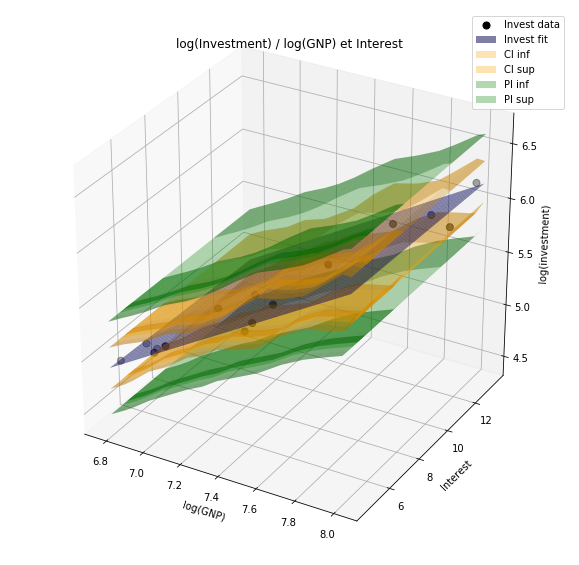

In [54]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(X_log,df['interest'], Y_log, label="Invest data", color='black', s=50 )

# Plan de prédiction : on détermine d'abord le maillage de la surface, ici 100 points
# entre le min et le max de chacun des axes
x_surf, y_surf = np.meshgrid(np.linspace(X_log.min(), X_log.max(), 100),\
                             np.linspace(df['interest'].min(), df['interest'].max(),100))

planPrédiction = ax.plot_surface(x_surf, y_surf, Beta[0] + Beta[1] * x_surf + Beta[2] * y_surf, \
                                 color="#000099", alpha=0.5, label='Invest fit',\
                                 linewidth=0, antialiased=True)

# hack pour éviter un bug lié à l'affichage de la légende
planPrédiction._facecolors2d=planPrédiction._facecolors3d
planPrédiction._edgecolors2d=planPrédiction._edgecolors3d

# Surfaces des bornes inf et sup de l'intervalle de confiance
xx, yy = np.meshgrid(X_log,df['interest'])
surfCIinf = ax.plot_surface(xx, yy, infCI3D, label='CI inf', alpha=0.3, color='orange')
surfCIinf._facecolors2d=surfCIinf._facecolors3d
surfCIinf._edgecolors2d=surfCIinf._edgecolors3d

surfCIsup = ax.plot_surface(xx, yy, supCI3D, label='CI sup', alpha=0.3, color='orange')
surfCIsup._facecolors2d=surfCIsup._facecolors3d
surfCIsup._edgecolors2d=surfCIsup._edgecolors3d

# Surfaces des bornes inf et sup de l'intervalle de confiance
surfPIinf = ax.plot_surface(xx, yy, infPI3D, label='PI inf', alpha=0.3, color='green')
surfPIinf._facecolors2d=surfPIinf._facecolors3d
surfPIinf._edgecolors2d=surfPIinf._edgecolors3d

surfPIsup = ax.plot_surface(xx, yy, supPI3D, label='PI sup', alpha=0.3, color='green')
surfPIsup._facecolors2d=surfPIsup._facecolors3d
surfPIsup._edgecolors2d=surfPIsup._edgecolors3d

ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(investment)')
ax.set_title('log(Investment) / log(GNP) et Interest')
ax.legend()
#ax.view_init(0, 60)

13) En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [55]:
regr.fit(matX,Y_log)
print("Coefficients Beta avec SKleanr : \nBeta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(regr.intercept_, *regr.coef_[1:]))

R2_SKlearn = r2_score(y_pred=matX.dot(Beta), y_true=Y_log)
print("Coefficient R2 SKlearn = {:f}".format(R2_SKlearn))

InvestPredSKlearn = regr.predict([X1_1000_10])
print("Prédiction GNP1000, interest 10 avec SKlearn = {:f}".format(InvestPredSKlearn[0]))

Coefficients Beta avec SKleanr : 
Beta0 = -2.180455 Beta1 = 1.051243 Beta2 = -0.006529
Coefficient R2 SKlearn = 0.963311
Prédiction GNP1000, interest 10 avec SKlearn = 5.015984


Les résultats obtenus avec la library Scikit-Learn sont **identiques** aux résultats obtenus par le calcul manuel... Ouf !